>
# **Group 1 - Methadone Maintenance Program**
## Maame Esi Aggrey-Peprah, Christina Cho, Christine Korth, Eva Tse


## Introduction ##
In response to the ongoing opioid crisis, effective treatment programs are critical for helping individuals achieve and sustain recovery. In this project, our aim is to develop a Methadone Mainteinance Treatment Program using Python, designed specifically for clinicians to assist those struggling with Opioid Use Disorder (OUD). Methadone is an opioid agonist is widely used for its effectiveness in eliminating withdrawal sysmptoms and relieving drug cravings.
Our program will serve as a tool to collect and organize patient information into a secure database, track methadone dosages,previous opioid type, duration of previous opioid use and measure both patient retention rates and overall effectiveness of the treatment. By using tools like Numpy and Pandas, our program will analyze trends and correlations in the collected data, providing valuable insights that that can inform treatment decisions and improve patient outcomes. This project not only enhances the clinical management of OUD but also contributes to the large effort of addressing the opioid pandemic.
## Steps for the Methadone Treatment Program ##
1. *Import Relevant Python packages*: We will import relevant libraries like Pandas, Numpy, matplotlib for data analysis, managing the dataset and user interface.
2. *Read and Load Data*: The program will collect patient information entered by clinicians. This information includes date of service, patient id, sex, age, race, previous opiod type, duration of previous opiod use and methadone dose.
3. *Data Manipulation and Exploratory Data Analysis*: We will clean and preprocess the data by adding columns, handling missing values, eliminating duplicates, and normalizing data. We will also perform descriptive statistics and visualize initial data patterns to understand the data well.
4. *Univariate and Bivariate Analysis*: We will conduct univariate analysis to explore individual variables, like methadone dosages and patient demographics. Also, perform bivariate analysis to investigate the relationship between variables , such as correlation between methadone dose levels and patient retention rates.
5. *Visual Representation*: The program will display results using various types of charts. For example:

   a) **Line** charts to track patient methadone dose by age group over time, retention rate by dose category over time
   
   b) **Bar** charts to compare averaage methadone dose by age group, different type of opioid use amongst patients
   
   c) **Pie** charts to visualize the distribution of diagnoses
   
   d) **Scatter** plots to illustrate correlations between methadone dose & retention rate


By following these steps, our program will provide valuable insights to clinicians assisting them to make informed decisions and improve patient care in the treatment of OUD.


### Importing necessary libraries

In [1]:
# Importing packages
import random # is random necessary? 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Collection and organization of patient information

In [2]:
# Empty Patient Record list to store inputted patient information as the dictionaries 
patient_record = []

In [3]:
# Function for Enter Patient Information
def enter_patient_info():
    # Prompts user for input
    print("\nEnter Patient Information:")
    date_of_service = input("Date of Service (MM-DD-YYYY): ")
    patient_id = input("Patient ID#: ")
    name = input("Name: ").lower()
    sex = input("Sex (M/F): ").lower()
    age = int(input("Age: "))
    race = input("Race/Ethnicity: ").lower()
    prev_opioid_type = input("Previous Opioid Use Type: ").lower()
    duration_previous_opioid_use = input("Duration of Previous Opioid Use (years): ")
    methadone_dose_mg = float(input("Methadone Dose (mg): "))
    
    # Adding inputs to dictionary
    patient_info = {
        "patient_id" : patient_id,
        "name" : name,
        "sex" : sex,
        "age" : age,
        "race" : race,
        "prev_opioid_type" : prev_opioid_type,
        "duration_previous_opioid_use" : duration_previous_opioid_use,
        "date_of_service" : date_of_service,
        "methadone_dose_mg" : methadone_dose_mg
    }
    patient_record.append(patient_info)
    print("\nPatient {} information is added/updated successfully.".format(name))  #need to put before return in order to print
    return

In [4]:
# Function to append patient's methadone dose and date of service
def update_methadone_dose():
    """
    Updates the methadone dose for a specific patient. 
    """
    # Prompts user for input 
    patient_id = input("\nEnter Patient ID: ")
    new_date = input("Enter Date of Service (MM-DD-YYYY): ")
    new_dose = input("Enter Methadone Dose (mg): ")
    
    # Makes sure dose is written as an integer
    try:
        new_dose = int(new_dose)
    except ValueError:
        print("\nInvalid dose entered. Please enter a numeric value.")
        return
    
    # Finds patient record
    patient_found = False
    for record in patient_record:
        if record["patient_id"] == patient_id:
            patient_found = True
            
            # Date of service' and 'methadone dose' are lists
            if not isinstance(record["date_of_service"], list):
                record["date_of_service"] = [record["date_of_service"]]
            if not isinstance(record["methadone_dose_mg"], list):
                record["methadone_dose_mg"] = [record["methadone_dose_mg"]]
            
            # To append new date and dose
            record["date_of_service"].append(new_date)
            record["methadone_dose_mg"].append(new_dose)
            print(f"\nPatient ID {patient_id} updated successfully.")
            break
    
    if not patient_found:
        print(f"\nPatient ID {patient_id} not found.")

In [5]:
# Look up patient record
def lookup():
    patient_id = input("\nEnter Patient ID: ")
    patient_found = False
    for record in patient_record: 
        if record ["patient_id"] == patient_id:
            print(record)
            patient_found = True
            break
    if not patient_found: 
        print("\nPatient not found.")

In [6]:
# Function for the input prompt/welcome screen
def intro_prompt():
    while True:
        print("\nWelcome!")
        print("\n1. Enter Patient Information")
        print("\n2. Update Patient's Methadone Dose")
        print("\n3. Look Up Patient Information")
        print("\n4. Exit")

        choice = input("\nPlease choose an option: ")

        if choice == "1":
            enter_patient_info()
        elif choice == "2":
            update_methadone_dose()
        elif choice == "3":
            lookup()
        elif choice == "4":
            print("\nGoodbye.")
            break
        else:
            print("\nPlease enter a valid option.")
            break
intro_prompt()


Welcome!

1. Enter Patient Information

2. Update Patient's Methadone Dose

3. Look Up Patient Information

4. Exit



Please choose an option:  4



Goodbye.


In [7]:
# View patient record list
patient_record

[]

### Data Preparation and Manipulation

In [8]:
# Turning Patient Record List to DataFrame

df = pd.DataFrame(patient_record)
df

""


In [9]:
# Export and save dataframe 
df.to_csv('dataset_draft.csv')
df

""


In [10]:
# Import data from .csv file
df = pd.read_csv("draft_dataset.csv")
df

,patient_id,name,sex,age,race,previous_opioid_use,duration_previous_opioid_use,date_of_service,methadone_dose_mg
0,1,patient,f,56,black,oxycodone,6,11-01-2024,75.0
1,1,patient,f,56,black,oxycodone,6,11-02-2024,75.0
2,1,patient,f,56,black,oxycodone,6,11-03-2024,75.0
3,1,patient,f,56,black,oxycodone,6,11-04-2024,75.0
4,1,patient,f,56,black,oxycodone,6,11-05-2024,75.0
...,...,...,...,...,...,...,...,...,...
1784,110,patient,m,46,white,heroin,13,11-26-2024,120.0
1785,110,patient,m,46,white,heroin,13,11-27-2024,120.0
1786,110,patient,m,46,white,heroin,13,11-28-2024,120.0
1787,110,patient,m,46,white,heroin,13,11-29-2024,120.0


In [11]:
# View first few rows of df
df.head()

,patient_id,name,sex,age,race,previous_opioid_use,duration_previous_opioid_use,date_of_service,methadone_dose_mg
0,1,patient,f,56,black,oxycodone,6,11-01-2024,75.0
1,1,patient,f,56,black,oxycodone,6,11-02-2024,75.0
2,1,patient,f,56,black,oxycodone,6,11-03-2024,75.0
3,1,patient,f,56,black,oxycodone,6,11-04-2024,75.0
4,1,patient,f,56,black,oxycodone,6,11-05-2024,75.0


In [12]:
# View last few rows of df
df.tail()

,patient_id,name,sex,age,race,previous_opioid_use,duration_previous_opioid_use,date_of_service,methadone_dose_mg
1784,110,patient,m,46,white,heroin,13,11-26-2024,120.0
1785,110,patient,m,46,white,heroin,13,11-27-2024,120.0
1786,110,patient,m,46,white,heroin,13,11-28-2024,120.0
1787,110,patient,m,46,white,heroin,13,11-29-2024,120.0
1788,110,patient,m,46,white,heroin,13,11-30-2024,120.0


In [13]:
# Print number of rows and columns in dataframe
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns.')

There are 1789 rows and 9 columns.


In [14]:
# View summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1789 entries, 0 to 1788
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   patient_id                    1789 non-null   int64  
 1   name                          1789 non-null   object 
 2   sex                           1789 non-null   object 
 3   age                           1789 non-null   int64  
 4   race                          1789 non-null   object 
 5   previous_opioid_use           1789 non-null   object 
 6   duration_previous_opioid_use  1789 non-null   int64  
 7   date_of_service               1789 non-null   object 
 8   methadone_dose_mg             1789 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 125.9+ KB


In [15]:
#inspect all column names

df.columns

Index(['patient_id', 'name', 'sex', 'age', 'race', 'previous_opioid_use',
       'duration_previous_opioid_use', 'date_of_service', 'methadone_dose_mg'],
      dtype='object')

In [16]:
# Checking the unique values in each column

df.nunique()

patient_id                      110
name                              1
sex                               2
age                              44
race                              4
previous_opioid_use               4
duration_previous_opioid_use     13
date_of_service                  30
methadone_dose_mg                31
dtype: int64

In [17]:
# Descriptive statistics to quickly analyze data, 
# T shows that we are transposing index & columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
patient_id,1789.0,53.190050,34.947623,1.0,23.0,46.0,86.0,110.0
age,1789.0,43.248183,13.626157,18.0,33.0,45.0,55.0,65.0
duration_previous_opioid_use,1789.0,5.067636,3.024584,1.0,3.0,5.0,6.0,13.0
methadone_dose_mg,1789.0,63.223030,28.910637,20.0,37.0,60.0,100.0,120.0


In [18]:
# Create a new dataframe that shows mean methadone dose per patient
average_dose_per_patient = pd.DataFrame([
    {'patient_id': patient_id, 'average_methadone_dose_mg': group['methadone_dose_mg'].mean()}
    for patient_id, group in df.groupby('patient_id')
])

average_dose_per_patient

,patient_id,average_methadone_dose_mg
0,1,75.000000
1,2,50.000000
2,3,55.000000
3,4,80.000000
4,5,55.000000
...,...,...
105,106,100.000000
106,107,120.000000
107,108,100.000000
108,109,100.666667


In [19]:
# Merge average_methadone_dose_mg column to the original dataframe
df = df.copy()
df = df.merge(average_dose_per_patient, on='patient_id', how='left')
df

,patient_id,name,sex,age,race,previous_opioid_use,duration_previous_opioid_use,date_of_service,methadone_dose_mg,average_methadone_dose_mg
0,1,patient,f,56,black,oxycodone,6,11-01-2024,75.0,75.0
1,1,patient,f,56,black,oxycodone,6,11-02-2024,75.0,75.0
2,1,patient,f,56,black,oxycodone,6,11-03-2024,75.0,75.0
3,1,patient,f,56,black,oxycodone,6,11-04-2024,75.0,75.0
4,1,patient,f,56,black,oxycodone,6,11-05-2024,75.0,75.0
...,...,...,...,...,...,...,...,...,...,...
1784,110,patient,m,46,white,heroin,13,11-26-2024,120.0,120.0
1785,110,patient,m,46,white,heroin,13,11-27-2024,120.0,120.0
1786,110,patient,m,46,white,heroin,13,11-28-2024,120.0,120.0
1787,110,patient,m,46,white,heroin,13,11-29-2024,120.0,120.0


In [20]:
# Create a new dataframe to see total # of days each patient attended clinic (out of 30 days) 
# .nunique() ensures removal of duplicates
total_days_attended = pd.DataFrame(df.groupby('patient_id')['date_of_service'].nunique())

# Change column name from date_of_service to total_days_attended
total_days_attended.columns = ['total_days_attended'] 
total_days_attended

# Merge the total_days_attended DataFrame with the original DataFrame
df = df.merge(total_days_attended, on='patient_id', how='left')
df

,patient_id,name,sex,age,race,previous_opioid_use,duration_previous_opioid_use,date_of_service,methadone_dose_mg,average_methadone_dose_mg,total_days_attended
0,1,patient,f,56,black,oxycodone,6,11-01-2024,75.0,75.0,24
1,1,patient,f,56,black,oxycodone,6,11-02-2024,75.0,75.0,24
2,1,patient,f,56,black,oxycodone,6,11-03-2024,75.0,75.0,24
3,1,patient,f,56,black,oxycodone,6,11-04-2024,75.0,75.0,24
4,1,patient,f,56,black,oxycodone,6,11-05-2024,75.0,75.0,24
...,...,...,...,...,...,...,...,...,...,...,...
1784,110,patient,m,46,white,heroin,13,11-26-2024,120.0,120.0,30
1785,110,patient,m,46,white,heroin,13,11-27-2024,120.0,120.0,30
1786,110,patient,m,46,white,heroin,13,11-28-2024,120.0,120.0,30
1787,110,patient,m,46,white,heroin,13,11-29-2024,120.0,120.0,30


In [21]:
# Function to categorize methadone dose (low-, moderate-, high-)
def categorize_dose(dose):
    if dose < 45:
        return 'Low Dose (<45mg)'
    elif dose <= 80:
        return 'Moderate Dose (50-80mg)'
    else:
        return 'High Dose (>80mg)'

# Create the dose category column
df['dose_category'] = df['methadone_dose_mg'].apply(categorize_dose)

# View updated dataframe
df

,patient_id,name,sex,age,race,previous_opioid_use,duration_previous_opioid_use,date_of_service,methadone_dose_mg,average_methadone_dose_mg,total_days_attended,dose_category
0,1,patient,f,56,black,oxycodone,6,11-01-2024,75.0,75.0,24,Moderate Dose (50-80mg)
1,1,patient,f,56,black,oxycodone,6,11-02-2024,75.0,75.0,24,Moderate Dose (50-80mg)
2,1,patient,f,56,black,oxycodone,6,11-03-2024,75.0,75.0,24,Moderate Dose (50-80mg)
3,1,patient,f,56,black,oxycodone,6,11-04-2024,75.0,75.0,24,Moderate Dose (50-80mg)
4,1,patient,f,56,black,oxycodone,6,11-05-2024,75.0,75.0,24,Moderate Dose (50-80mg)
...,...,...,...,...,...,...,...,...,...,...,...,...
1784,110,patient,m,46,white,heroin,13,11-26-2024,120.0,120.0,30,High Dose (>80mg)
1785,110,patient,m,46,white,heroin,13,11-27-2024,120.0,120.0,30,High Dose (>80mg)
1786,110,patient,m,46,white,heroin,13,11-28-2024,120.0,120.0,30,High Dose (>80mg)
1787,110,patient,m,46,white,heroin,13,11-29-2024,120.0,120.0,30,High Dose (>80mg)


In [22]:
# Function to categorize age groups (<25, 25-34, 35-49, 50+)
def age_group(age):
    if age < 25:
        return '<25'
    elif 25 <= age <= 34:
        return '25-34'
    elif 35 <= age <= 49:
        return '35-49'
    else:
        return '50+'

# Create a new column called 'age_group'
df['age_group'] = df['age'].apply(age_group)

# View updated dataframe
df

,patient_id,name,sex,age,race,previous_opioid_use,duration_previous_opioid_use,date_of_service,methadone_dose_mg,average_methadone_dose_mg,total_days_attended,dose_category,age_group
0,1,patient,f,56,black,oxycodone,6,11-01-2024,75.0,75.0,24,Moderate Dose (50-80mg),50+
1,1,patient,f,56,black,oxycodone,6,11-02-2024,75.0,75.0,24,Moderate Dose (50-80mg),50+
2,1,patient,f,56,black,oxycodone,6,11-03-2024,75.0,75.0,24,Moderate Dose (50-80mg),50+
3,1,patient,f,56,black,oxycodone,6,11-04-2024,75.0,75.0,24,Moderate Dose (50-80mg),50+
4,1,patient,f,56,black,oxycodone,6,11-05-2024,75.0,75.0,24,Moderate Dose (50-80mg),50+
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784,110,patient,m,46,white,heroin,13,11-26-2024,120.0,120.0,30,High Dose (>80mg),35-49
1785,110,patient,m,46,white,heroin,13,11-27-2024,120.0,120.0,30,High Dose (>80mg),35-49
1786,110,patient,m,46,white,heroin,13,11-28-2024,120.0,120.0,30,High Dose (>80mg),35-49
1787,110,patient,m,46,white,heroin,13,11-29-2024,120.0,120.0,30,High Dose (>80mg),35-49


In [23]:
#calculate retention rate of patient
""" retention rate = (total days attended by patient / total days) x 100 """
total_days = 30 #1 month data from program
df['retention_rate'] = (df['total_days_attended']/ total_days) * 100
df

,patient_id,name,sex,age,race,previous_opioid_use,duration_previous_opioid_use,date_of_service,methadone_dose_mg,average_methadone_dose_mg,total_days_attended,dose_category,age_group,retention_rate
0,1,patient,f,56,black,oxycodone,6,11-01-2024,75.0,75.0,24,Moderate Dose (50-80mg),50+,80.0
1,1,patient,f,56,black,oxycodone,6,11-02-2024,75.0,75.0,24,Moderate Dose (50-80mg),50+,80.0
2,1,patient,f,56,black,oxycodone,6,11-03-2024,75.0,75.0,24,Moderate Dose (50-80mg),50+,80.0
3,1,patient,f,56,black,oxycodone,6,11-04-2024,75.0,75.0,24,Moderate Dose (50-80mg),50+,80.0
4,1,patient,f,56,black,oxycodone,6,11-05-2024,75.0,75.0,24,Moderate Dose (50-80mg),50+,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784,110,patient,m,46,white,heroin,13,11-26-2024,120.0,120.0,30,High Dose (>80mg),35-49,100.0
1785,110,patient,m,46,white,heroin,13,11-27-2024,120.0,120.0,30,High Dose (>80mg),35-49,100.0
1786,110,patient,m,46,white,heroin,13,11-28-2024,120.0,120.0,30,High Dose (>80mg),35-49,100.0
1787,110,patient,m,46,white,heroin,13,11-29-2024,120.0,120.0,30,High Dose (>80mg),35-49,100.0


In [24]:
#export updated dataframe with all merged/added columns, if needed
df.to_csv('final_dataset.csv', index=False)

## Clean Data

In [25]:
# Clean patient count by removing duplicates using .nunique()
clean_patient_count = df['patient_id'].nunique()
print(f"total patient count: {clean_patient_count}")

# Remove duplicate rows (if any)
cleaned_df = df.drop_duplicates()

# Aggregate data by patient_id (one row per patient) using .agg 
cleaned_df = cleaned_df.groupby('patient_id').agg({
    'name': 'first',
    'sex': 'first',
    'age': 'first',
    'race': 'first',
    'previous_opioid_use' : 'first',
    'duration_previous_opioid_use' : 'mean',
    'methadone_dose_mg' : 'mean', 
    'total_days_attended': 'max',   
    'dose_category': 'first',  
    'age_group' : 'max',
    'retention_rate': 'max',  
}).reset_index()

# Verify clean dataframe
cleaned_patient_count = cleaned_df['patient_id'].nunique()
cleaned_df


total patient count: 110


,patient_id,name,sex,age,race,previous_opioid_use,duration_previous_opioid_use,methadone_dose_mg,total_days_attended,dose_category,age_group,retention_rate
0,1,patient,f,56,black,oxycodone,6.0,75.000000,24,Moderate Dose (50-80mg),50+,80.000000
1,2,patient,f,50,other,oxycodone,3.0,50.000000,19,Moderate Dose (50-80mg),50+,63.333333
2,3,patient,m,21,white,morphine,6.0,55.000000,19,Moderate Dose (50-80mg),<25,63.333333
3,4,patient,m,19,black,heroin,9.0,80.000000,30,Moderate Dose (50-80mg),<25,100.000000
4,5,patient,f,32,hispanic,morphine,6.0,55.000000,20,Moderate Dose (50-80mg),25-34,66.666667
...,...,...,...,...,...,...,...,...,...,...,...,...
105,106,patient,m,29,white,heroin,7.0,100.000000,30,High Dose (>80mg),25-34,100.000000
106,107,patient,m,57,white,heroin,10.0,120.000000,30,High Dose (>80mg),50+,100.000000
107,108,patient,m,59,white,fentanyl,8.0,100.000000,30,High Dose (>80mg),50+,100.000000
108,109,patient,f,36,white,fentanyl,7.0,100.666667,30,High Dose (>80mg),35-49,100.000000


In [26]:
# Check the column names in your updated dataframe
print(cleaned_df.columns)


Index(['patient_id', 'name', 'sex', 'age', 'race', 'previous_opioid_use',
       'duration_previous_opioid_use', 'methadone_dose_mg',
       'total_days_attended', 'dose_category', 'age_group', 'retention_rate'],
      dtype='object')


### Data Visualization

#### Bar Graph

In [27]:
import seaborn as sns

# Group by age group and calculate the average methadone dose
age_group = cleaned_df.groupby('age_group')['duration_previous_opioid_use'].mean().reset_index()
age_group_order = ['<25', '25-34', '35-49', '50+']

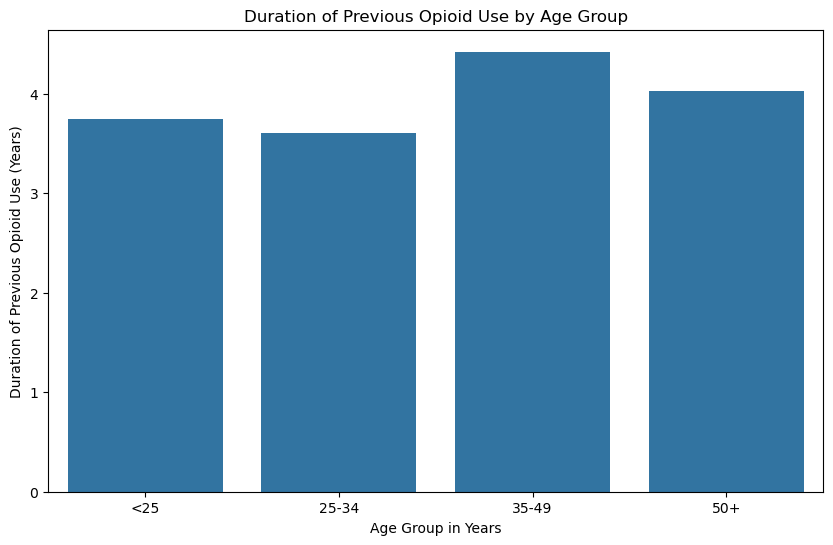

In [28]:
# Create a bar plot for average methadone dose by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='duration_previous_opioid_use', data=age_group, order=age_group_order)
plt.title('Duration of Previous Opioid Use by Age Group')
plt.xlabel('Age Group in Years')
plt.ylabel('Duration of Previous Opioid Use (Years)')
plt.show()


#idk if this graph is meaningful. trying to make more meaningful conclusions

In [29]:
# filters dataframe by specific 'word' found within specified column
print(cleaned_df.shape)
filtered = cleaned_df.loc[cleaned_df.previous_opioid_use == 'fentanyl'] 
print(filtered.shape) 
filtered

(110, 12)
(6, 12)


,patient_id,name,sex,age,race,previous_opioid_use,duration_previous_opioid_use,methadone_dose_mg,total_days_attended,dose_category,age_group,retention_rate
45,46,patient,f,43,hispanic,fentanyl,7.0,100.000000,30,High Dose (>80mg),35-49,100.0
70,71,patient,m,29,white,fentanyl,11.0,100.000000,30,High Dose (>80mg),25-34,100.0
101,102,patient,f,60,white,fentanyl,6.0,100.000000,30,High Dose (>80mg),50+,100.0
102,103,patient,m,63,white,fentanyl,5.0,100.000000,30,High Dose (>80mg),50+,100.0
107,108,patient,m,59,white,fentanyl,8.0,100.000000,30,High Dose (>80mg),50+,100.0
108,109,patient,f,36,white,fentanyl,7.0,100.666667,30,High Dose (>80mg),35-49,100.0


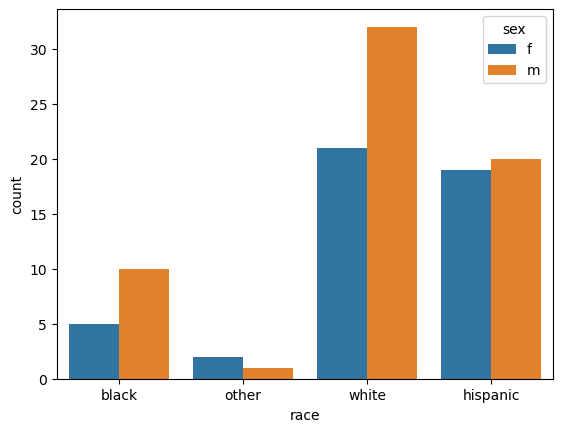

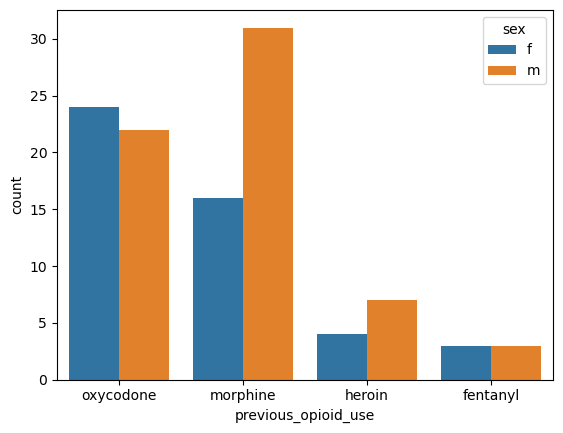

In [30]:
# create and display count plots for the "race" and "previous_opioid_use" columns, with bars colored by the "sex" column
totalCleandata= len(cleaned_df)
columns = ["race","previous_opioid_use"]
for i in columns:

    ax1 = sns.countplot(data=cleaned_df,x= i,hue="sex")
    
    plt.show()

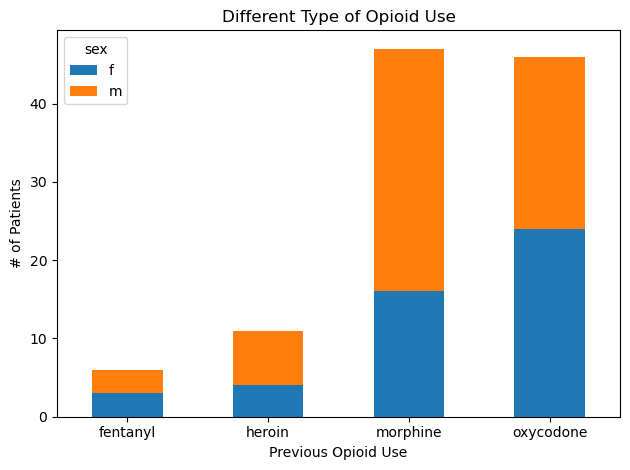

In [31]:
# Unstack plot showing different type of opioid use depending on sex
cleaned_df.groupby(['previous_opioid_use','sex']).size().unstack().plot(kind='bar',stacked=True)
plt.title('Different Type of Opioid Use' )
plt.xticks(rotation = 4)
plt.xlabel('Previous Opioid Use')
plt.ylabel('# of Patients')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

# Interpretation
# More male patients in treatment clinic than females 
# Most of the patients previously used morphine or oxycodone 

In [32]:
# confirm # of patients per sex
sex_counts = cleaned_df.drop_duplicates(subset=['patient_id'])['sex'].value_counts()

# shows the counts per sex (male v female)
sex_counts


sex
m    63
f    47
Name: count, dtype: int64

In [33]:
# confirm # of patients in previous opioid use category
previous_opioid_use_counts = cleaned_df.drop_duplicates(subset=['patient_id'])['previous_opioid_use'].value_counts()

# shows the counts for previous opioid use category
previous_opioid_use_counts


previous_opioid_use
morphine     47
oxycodone    46
heroin       11
fentanyl      6
Name: count, dtype: int64

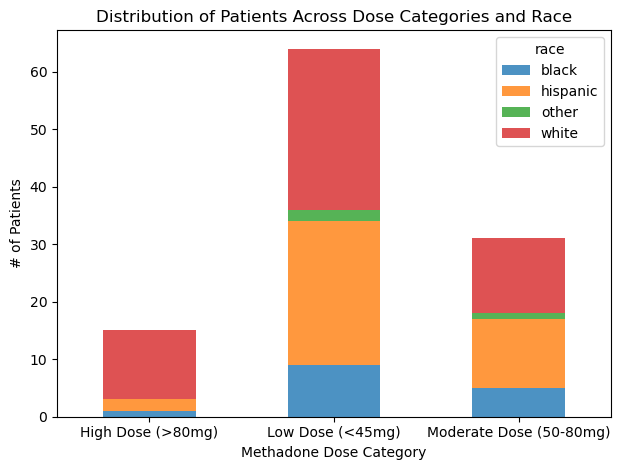

In [34]:
# Unstack plot to show the distribution of patients across dose categories and race
dose_race_distribution = pd.crosstab(cleaned_df['dose_category'], cleaned_df['race'])

#pd.crosstab() is a function used to compute a cross-tabulation (also known as a contingency table) of two or more factors 
#this helps analyze relationship between categorical variables by showing the frequency distribution 

# Plot and customize
dose_race_distribution.plot(kind='bar', stacked=True, alpha=0.8)
plt.title('Distribution of Patients Across Dose Categories and Race')
plt.xlabel('Methadone Dose Category')
plt.ylabel('# of Patients')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Interpretation
# Most patients were prescribed low-dose methadone 


In [35]:
# confirm # of patients in each dose category
dose_category_counts = cleaned_df.drop_duplicates(subset=['patient_id'])['dose_category'].value_counts()

# shows the counts for each dose category
dose_category_counts


dose_category
Low Dose (<45mg)           64
Moderate Dose (50-80mg)    31
High Dose (>80mg)          15
Name: count, dtype: int64

### Line Graphs


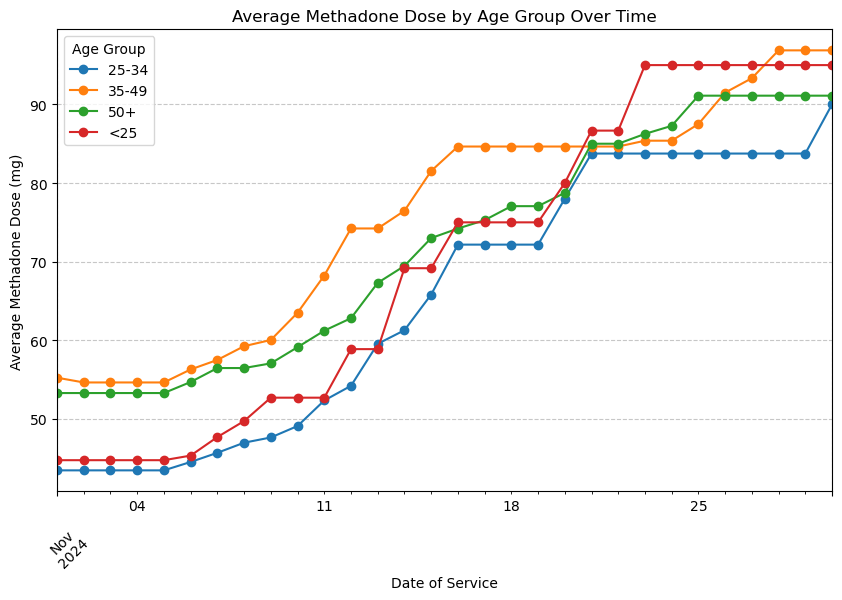

In [36]:
# Convert date_of_service to datetime for time-based analysis
df['date_of_service'] = pd.to_datetime(df['date_of_service'])

# Methadone Dose vs Age Group (Average Over Time)
age_group_dose_over_time = df.groupby([df['date_of_service'], 'age_group'])['methadone_dose_mg'].mean().unstack()

# Plot the line chart for methadone dose over time by age group
age_group_dose_over_time.plot(kind='line', marker='o', figsize=(10, 6), title='Average Methadone Dose by Age Group Over Time')
plt.xlabel('Date of Service')
plt.ylabel('Average Methadone Dose (mg)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Age Group')
plt.show()

# Interpretation
# The average methadone dose increased over time for all age-groups 

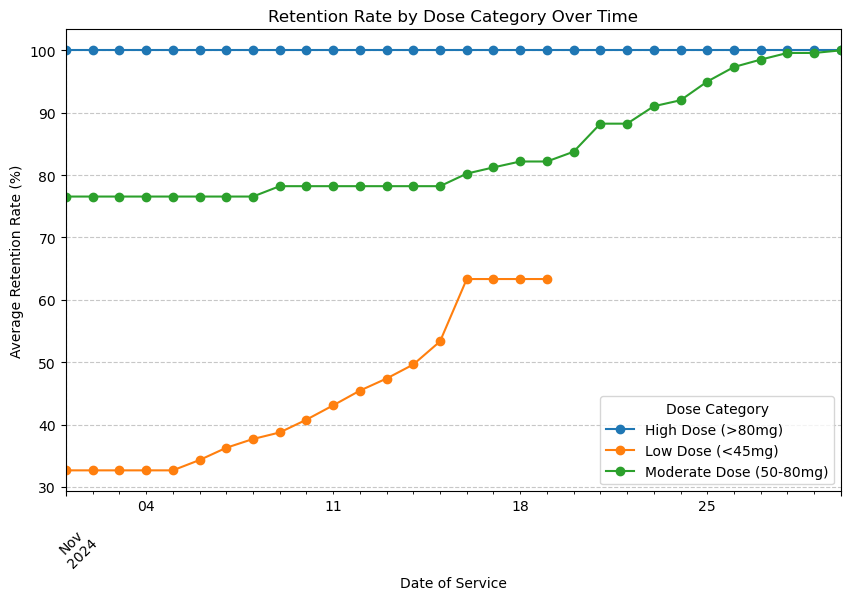

In [37]:
# Retention Rate Across Dose Categories Over Time
dose_category_retention_over_time = df.groupby([df['date_of_service'], 'dose_category'])['retention_rate'].mean().unstack()

# Plot the line chart for retention rate over time by dose category
dose_category_retention_over_time.plot(kind='line', marker='o', figsize=(10, 6), title='Retention Rate by Dose Category Over Time')
plt.xlabel('Date of Service')
plt.ylabel('Average Retention Rate (%)')
plt.legend(title='Dose Category')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Interpretation
# Patients who started with a low-dose methadone dose were not able to be retained in treatment program
# (Low doses are not sufficient in managing patient withdrawal symptoms)
# Patients who started with moderate-dose methadone had a retention rate > 50% and increased over time as doses increased
# (Higher doses of methadone increases retention rate)
# Patients who started with a high-dose methadone had a retention rate of 100% 

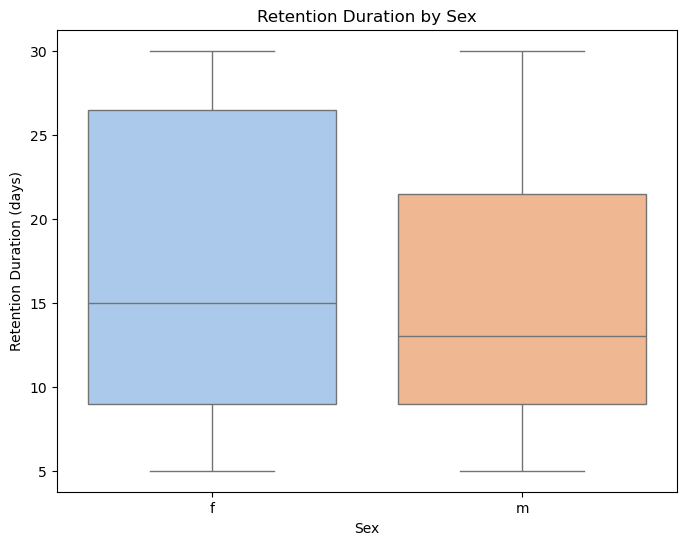

In [38]:
# Box plot: Retention duration by sex
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='total_days_attended', data=cleaned_df, hue='sex', palette='pastel')
plt.title('Retention Duration by Sex')
plt.xlabel('Sex')
plt.ylabel('Retention Duration (days)')
plt.show()

# Interpretation
# Women, on average, stayed in the program longer than men.
# No outliers - since we created our own dataset- 

### Pie Charts

In [39]:
# Grouped by 'Race' and count the occurrences
race_counts = cleaned_df['race'].value_counts() 
race_counts

race
white       53
hispanic    39
black       15
other        3
Name: count, dtype: int64

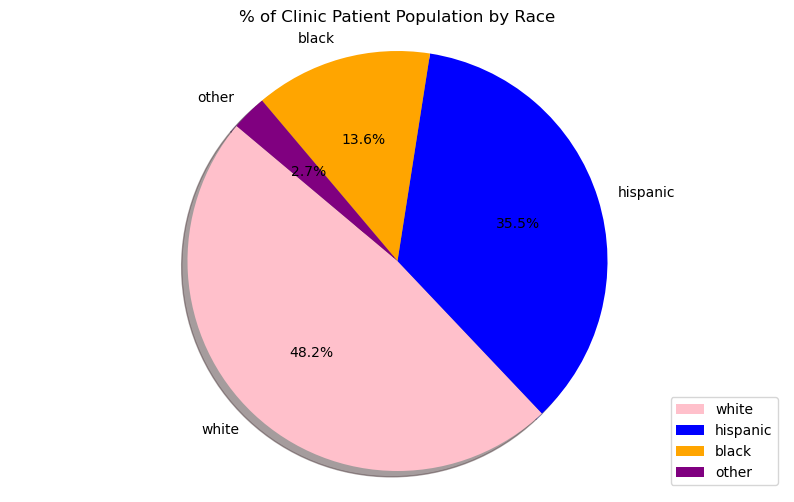

In [40]:
# Define custom colors using real color names
colors = ['pink', 'blue', 'orange', 'purple']

# Create a pie chart with custom colors
plt.figure(figsize=(10, 6))
plt.pie(race_counts, labels=race_counts.index, colors=colors[:len(race_counts)], autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('% of Clinic Patient Population by Race')
plt.legend(race_counts.index, loc="lower right", bbox_to_anchor=(1.0, 0))
plt.show()

# Interpretation:
# 48.2% of patients were white, 35.5% of patients were hispanic, 13.6% of patients were black, and 2.7% were other races 

In [41]:
#Pie chart - % of patients who took high-dose, moderate-dose, low-dose methadone
dose_counts = cleaned_df['dose_category'].value_counts()
dose_counts

dose_category
Low Dose (<45mg)           64
Moderate Dose (50-80mg)    31
High Dose (>80mg)          15
Name: count, dtype: int64

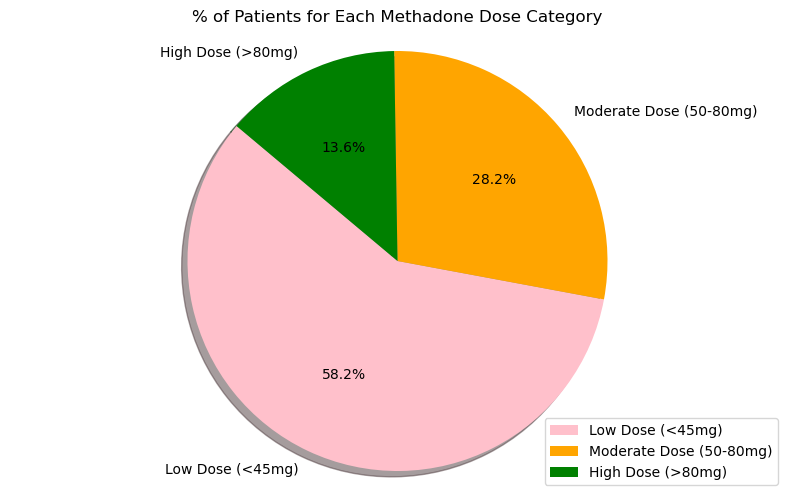

In [42]:
# Define custom colors
colors = ['pink', 'orange', 'green']

# Create a pie chart with custom colors
plt.figure(figsize=(10, 6))
plt.pie(dose_counts, labels=dose_counts.index, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('% of Patients for Each Methadone Dose Category')
plt.legend(dose_counts.index, loc="lower right", bbox_to_anchor=(1.0, 0))
plt.show()

# Interpretation:
# 58.2% of patients were prescribed low-dose methadone ( < 45mg)
# 28.2% of patients were prescribed moderate-dose methadone ( 50-80mg)
# 13.6% of patients were prescribed high-dose methadone ( > 80mg)

#### Scatter Plot

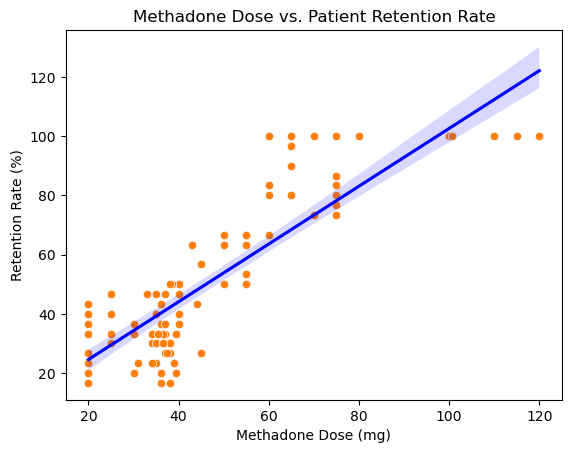

In [43]:
#Scatter Plot (e.g. correlation between methadone dose and patient retention rate)
 
sns.scatterplot(data=cleaned_df, x = 'methadone_dose_mg', y = 'retention_rate')
 
plt.title('Methadone Dose vs. Patient Retention Rate')
 
# Create a scatter plot
sns.scatterplot(data=cleaned_df, x='methadone_dose_mg', y='retention_rate')
 
# Add a regression line to the scatter plot
sns.regplot(data=cleaned_df, x='methadone_dose_mg', y='retention_rate', scatter=False, color='blue')


# Customize 
plt.xlabel('Methadone Dose (mg)')
plt.ylabel('Retention Rate (%)')
plt.show()

# Scatter plot shows a positive correlation between methadone dose & patient retention rate
# Higher the dose of methadone, better the retention rate

## Limitations

1. Very time consuming creating a dataset
2. Need a larger population (more patients)
3. Need a longer timeframe (30 days is not enough)
4. Difficulty plotting graphs using time / dates of services

# Conclusion

1. Higher doses of methadone are associated with improved treatment retention rates.
2.  The highest number of patients (64 out of 110 patients) were prescribed low dose methadone (<45mg) suggesting that it is the most commonly prescribed methadone dose. This reflects a cautious approach used by prescribers to initial dosing. Since higher doses of methadone are associated with better retention rate, a change in prescribing pattern (higher dosing of methadone) may be needed.

In [44]:
# need to try to correleate previous opioid use and retention rate??